In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Loading the data 

df = pd.read_csv('data/Salary_Data.csv.xls')

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0, 0.5, 'Salaries')

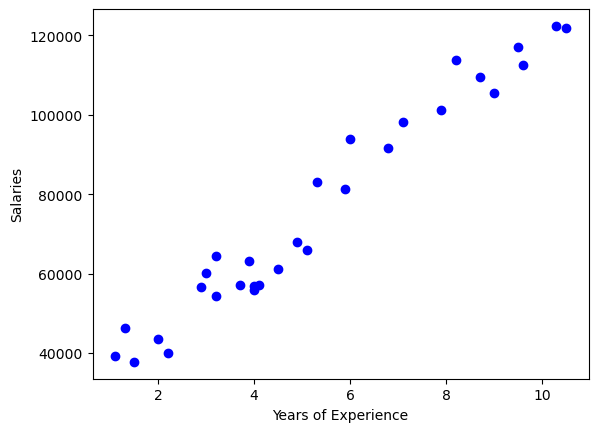

In [17]:
#Checking the distribution of data

plt.scatter(df["YearsExperience"], df["Salary"], color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salaries")

In [33]:
#Define the features (Independed and Dependent Variables)

#This X would give you a DataFrame (2D) 
#Most ML Libraries expect 2D input for features 

#Series mean a vector[:,0]
#DataFrame means a Matrix[:,[0]]

#X must be a matrix, even if it has one column

X = df.iloc[:,[0]]
y = df.iloc[0:,-1]

print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [27]:
#Important 
#This would give you a series (1D)

#X = df.iloc[:,0]
#print(X)